<hr>
<br>
<center>
  <img src="https://www.tecazuay.edu.ec/wp-content/uploads/2023/07/LOGO-RECTANGULAR_SIN-FONDO.png" height="110"/>

  <h2><b>TECNOLOGÍA SUPERIOR EN BIG DATA <br> <br> SISTEMA INTELIGENTE DE PREDICCIÓN DE INVENTARIOS CON BIG DATA PARA EL MERCADO DE CONSTRUCCIÓN</b></h2>

  <b>Integrantes:</b> Jimmy Sumba, Freddy Montalván, Eduardo Mendieta.

  <b>Docente:</b> Ing. Lady Sangacha.

  <b>Fecha:</b> 14/02/2025
</center>
<br><hr>

<p><b>Objetivo General: </b></p>

Predecir la demanda de productos de construcción para el análisis inteligente en las ventas y satisfacción de cliente que permita ampliar el negocio MQ distribuidora a través de herramientas tecnológicas.

<br>
<p><b>Objetivos Específicos: </b></p>

- Obtener una data set para el análisis inteligente en las ventas y satisfacción de cliente que permita ampliar el negocio MQ distribuidora.
- Modelar un algoritmo para la predicción de inventarios a través de modelos de machine learning con Python.
- Visualizar de forma interactiva el análisis inteligente de las ventas y satisfacción de cliente que permita ampliar el negocio MQ distribuidora.


<hr>
<br>
<h2><b>1. CAPTACIÓN DE LOS DATOS</b></h2>


Los datos fueron recolectados a partir de facturas y registros físicos mantenidos por la empresa, organizados en un archivo de Excel. Estos datos se transfirieron manualmente a la aplicación de Excel. Además, se procedió a la creación de un modelo relacional de base de datos que representa la estructura del negocio, con la colaboración del administrador, quien proporcionó información valiosa tanto para la creación del conjunto de datos como para la generación del esquema de la base de datos. Posteriormente, el conjunto de datos en Excel se carga en un DataFrame de Pandas para su limpieza, análisis y modelamiento.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('dataset.xlsx', dtype={'rucCICli': str, 'telefono': str, 'climaPrecipitaciones': float, 'mes': int})

<hr>
<br>
<h2><b>2. PROCESAMIENTO Y PREPROCESAMIENTO</b></h2>


Dado que el conjunto de datos ha sido creado de forma manual, es posible que contenga inconsistencias que deben ser abordadas mediante técnicas de preprocesamiento de datos, incluyendo la limpieza y transformación de datos. Todo esto es necesario para la depuración de errores y el manejo adecuado del formato de los datos.

In [ ]:
df = data.copy().dropna(how='all')

In [ ]:
df.head()

,codFactura,fechaEmision,stockMensual,rucCICli,nombreCli,telefono,direccion,zona,correo,formaPago,...,categoria,unidadMedida,tipo,materiaPrima,cantidad,precioUnitario,costo,vendedor,mes,climaPrecipitaciones
0,002-004,2025-01-20,20000,DESCONOCIDO,ING. CRISTIAN BRAVO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,c.ing.bravo4@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,1000,0.24,0.20,CHRISTIAN SANMARTIN,1,3.3
1,084-25,2025-01-10,18000,0190505588001,CONSORCIO AUSTROBUILT,0939933256,ECUADOR SYN Y GRAN COLOMBIA,CUENCA-CENTRO,austrobuilt@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,GREDA,500,0.25,0.21,GONZALO MONTALVÁN,1,4.0
2,002-003,2025-01-08,15000,0105023345001,RAQUEL BRAVO,0994115390,CESAR ANDRADE Y CORDERO,CUENCA-NOROESTE,enriquezm234c@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,1000,0.24,0.20,JUAN MONTALVÁN,1,8.8
3,083-24,2024-12-25,15000,0195094926001,GREENHOME CONSTRUCCIONES Y PROYECTOS S.A.S,0995719054,SAN JOAQUIN,CUENCA-SUR,corporation.gh@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,60,0.43,0.37,JUAN MONTALVÁN,12,10.2
4,083-24,2024-12-25,7000,0195094926001,GREENHOME CONSTRUCCIONES Y PROYECTOS S.A.S,0995719054,SAN JOAQUIN,CUENCA-SUR,corporation.gh@gmail.com,EFECTIVO,...,TECHOS,PIEZA,VOLUMEN,ARCILLA,265,0.26,0.22,CHRISTIAN SANMARTIN,12,10.2


In [ ]:
df.shape

(309, 24)

In [ ]:
def imp_nulos_por_columna(df):
    print(df.isnull().sum().sort_values(ascending=False))


imp_nulos_por_columna(df)

iva                     50
cantidad                 6
unidadMedida             6
nombreCli                1
codFactura               0
nombreProducto           0
mes                      0
vendedor                 0
costo                    0
precioUnitario           0
materiaPrima             0
tipo                     0
categoria                0
codProducto              0
fechaEmision             0
descuento                0
formaPago                0
correo                   0
zona                     0
direccion                0
telefono                 0
rucCICli                 0
stockMensual             0
climaPrecipitaciones     0
dtype: int64


In [ ]:
df.iva = df.iva.fillna(0.12)
df.costo = df.costo.fillna(0)
df.unidadMedida = df.unidadMedida.fillna('DESCONOCIDO')
df.nombreCli = df.nombreCli.fillna('DESCONOCIDO')


imp_nulos_por_columna(df)

cantidad                6
codFactura              0
fechaEmision            0
mes                     0
vendedor                0
costo                   0
precioUnitario          0
materiaPrima            0
tipo                    0
unidadMedida            0
categoria               0
nombreProducto          0
codProducto             0
descuento               0
iva                     0
formaPago               0
correo                  0
zona                    0
direccion               0
telefono                0
nombreCli               0
rucCICli                0
stockMensual            0
climaPrecipitaciones    0
dtype: int64


In [ ]:
df.nombreProducto.sort_values().unique().tolist()

['ALFAGIAS',
 'DESCONOCIDO',
 'FACHALETA 7CM',
 'FACHALETA 9CM',
 'LADRILLO 4 HUECOS CARA 13CM',
 'LADRILLO ARTESANAL',
 'LADRILLO OBRA',
 'LADRILLO PISO',
 'LADRILLO PISO GRES',
 'LADRILLO VISTO',
 'LADRILLO VISTO 4 HUECOS',
 'PANELON',
 'RASTRERAS',
 'TAPAS TEJA',
 'TEJA',
 'TEJA ARTESANAL',
 'TEJA CUADRADA',
 'TEJA NATURAL',
 'TEJA P7',
 'TEJA REDONDA',
 'TOCHANO 10X40',
 'TOCHANO 13X30',
 'TOCHANO 13X40',
 'TRANSPORTE',
 'TRAPECIO']

In [ ]:
def obtener_categoria(nombre_producto):
    categoria = df.loc[df['nombreProducto'] == nombre_producto, 'categoria']
    return categoria.iloc[0] if not categoria.empty else "DESCONOCIDO"


codigo_producto = {producto: f'P{i+1}-{obtener_categoria(producto)[:3]}-{producto[:3]}' for i, producto in enumerate(df.nombreProducto.unique())}
df.codProducto = df.nombreProducto.map(codigo_producto)

In [ ]:
df.unidadMedida.unique().tolist()

['PIEZA', 'METRO', 'CARRERA', 'DESCONOCIDO', 'CAJA(20PZ)']

In [ ]:
tipos = {
    'PIEZA': 'VOLUMEN',
    'METRO': 'LONGITUD',
    'CAJA(20PZ)': 'VOLUMEN',
    'CARRERA': 'TIEMPO',
}

df.tipo = df.unidadMedida.map(tipos)
df.tipo = df.tipo.fillna('DESCONOCIDO')

In [ ]:
df.dtypes

,0
codFactura,object
fechaEmision,datetime64[ns]
stockMensual,int64
rucCICli,object
nombreCli,object
telefono,object
direccion,object
zona,object
correo,object
formaPago,object


In [ ]:
df.cantidad = pd.to_numeric(df.cantidad, errors='coerce')
df.cantidad = df.cantidad.fillna(0)

df['anio'] = df.fechaEmision.dt.year

imp_nulos_por_columna(df)

codFactura              0
nombreProducto          0
climaPrecipitaciones    0
mes                     0
vendedor                0
costo                   0
precioUnitario          0
cantidad                0
materiaPrima            0
tipo                    0
unidadMedida            0
categoria               0
codProducto             0
fechaEmision            0
descuento               0
iva                     0
formaPago               0
correo                  0
zona                    0
direccion               0
telefono                0
nombreCli               0
rucCICli                0
stockMensual            0
anio                    0
dtype: int64


<hr>
<br>
<h2><b>3. EXPLORACIÓN DE LOS DATOS</b></h2>

Este paso es fundamental para comprender la estructura, calidad y características de la información contenida en dataset. Este proceso nos permite identificar patrones, tendencias y anomalías que pueden influir en los resultados finales.

In [ ]:
filas, columnas = df.shape
print(f'El DataFrame tiene {filas} filas y {columnas} columnas.')

El DataFrame tiene 309 filas y 24 columnas.


In [ ]:
df.head()

,codFactura,fechaEmision,stockMensual,rucCICli,nombreCli,telefono,direccion,zona,correo,formaPago,...,categoria,unidadMedida,tipo,materiaPrima,cantidad,precioUnitario,costo,vendedor,mes,climaPrecipitaciones
0,002-004,2025-01-20,20000,DESCONOCIDO,ING. CRISTIAN BRAVO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,c.ing.bravo4@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,1000.0,0.24,0.20,CHRISTIAN SANMARTIN,1,3.3
1,084-25,2025-01-10,18000,0190505588001,CONSORCIO AUSTROBUILT,0939933256,ECUADOR SYN Y GRAN COLOMBIA,CUENCA-CENTRO,austrobuilt@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,GREDA,500.0,0.25,0.21,GONZALO MONTALVÁN,1,4.0
2,002-003,2025-01-08,15000,0105023345001,RAQUEL BRAVO,0994115390,CESAR ANDRADE Y CORDERO,CUENCA-NOROESTE,enriquezm234c@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,1000.0,0.24,0.20,JUAN MONTALVÁN,1,8.8
3,083-24,2024-12-25,15000,0195094926001,GREENHOME CONSTRUCCIONES Y PROYECTOS S.A.S,0995719054,SAN JOAQUIN,CUENCA-SUR,corporation.gh@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,60.0,0.43,0.37,JUAN MONTALVÁN,12,10.2
4,083-24,2024-12-25,7000,0195094926001,GREENHOME CONSTRUCCIONES Y PROYECTOS S.A.S,0995719054,SAN JOAQUIN,CUENCA-SUR,corporation.gh@gmail.com,EFECTIVO,...,TECHOS,PIEZA,VOLUMEN,ARCILLA,265.0,0.26,0.22,CHRISTIAN SANMARTIN,12,10.2


In [ ]:
df.tail()

,codFactura,fechaEmision,stockMensual,rucCICli,nombreCli,telefono,direccion,zona,correo,formaPago,...,categoria,unidadMedida,tipo,materiaPrima,cantidad,precioUnitario,costo,vendedor,mes,climaPrecipitaciones
304,276-16,2016-09-27,9000,0103657086001,ANGEL CABRERA FAJARDO,4075684,VIA CHALLUABAMBA,CUENCA-NORTE,cabrera.angelfajardo@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,GREDA,720.0,0.00,0.00,ROSA QUITO,9,0.0
305,276-16,2016-09-27,0,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,EFECTIVO,...,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,0.0,0.00,0.00,MATEO SANMARTIN,9,0.0
306,002-001,2017-10-01,12000,DESCONOCIDO,ING. PATRICIO ROMAN,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,ing.r.patricio@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,1000.0,0.32,0.27,PAOLA MONTALVÁN,10,10.0
307,002-001,2016-09-26,9000,DESCONOCIDO,ING. PATRICIO ROMAN,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,ing.r.patricio@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,GREDA,600.0,0.24,0.20,CHRISTIAN SANMARTIN,9,0.0
308,000-360,2020-10-11,12000,0100958711001,MANUEL SINCHI,0988852988,GUAYAQUIL,GUAYAQUIL,manuel.sinchi01@gmail.com,EFECTIVO,...,TECHOS,PIEZA,VOLUMEN,ARCILLA,6000.0,0.15,0.13,MATEO SANMARTIN,10,0.6


In [ ]:
df.sample(5)

,codFactura,fechaEmision,stockMensual,rucCICli,nombreCli,telefono,direccion,zona,correo,formaPago,...,categoria,unidadMedida,tipo,materiaPrima,cantidad,precioUnitario,costo,vendedor,mes,climaPrecipitaciones
24,002-001,2024-09-17,14000,DESCONOCIDO,ING. PATRICIO ROMAN,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,ing.r.patricio@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,1000.0,0.24,0.20,GONZALO MONTALVÁN,9,2.9
275,000-342,2017-11-15,11000,0103155313,SONIA CRIOLLO,4083010,RACAR,CUENCA-NOROESTE,sonia.contact1978@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,GREDA,100.0,0.25,0.21,JUAN MONTALVÁN,11,6.7
277,000-341,2017-11-08,11000,0101788958001,MAURO PAREDEZ,4081855,CALLE DEL AMAY,CUENCA-NOROESTE,muaroparedes50@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,1150.0,0.30,0.26,MATEO SANMARTIN,11,0.4
3,083-24,2024-12-25,15000,0195094926001,GREENHOME CONSTRUCCIONES Y PROYECTOS S.A.S,0995719054,SAN JOAQUIN,CUENCA-SUR,corporation.gh@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,60.0,0.43,0.37,JUAN MONTALVÁN,12,10.2
115,022-23,2023-09-18,11000,0101788958001,MAURO PAUL PAREDES PIEDRA,0979199503,BATAN S/N,CUENCA-NOROESTE,muaroparedes50@gmail.com,EFECTIVO,...,LADRILLOS,PIEZA,VOLUMEN,ARCILLA,2670.0,0.33,0.28,JUAN MEJÍA,9,1.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   codFactura            309 non-null    object        
 1   fechaEmision          309 non-null    datetime64[ns]
 2   stockMensual          309 non-null    int64         
 3   rucCICli              309 non-null    object        
 4   nombreCli             309 non-null    object        
 5   telefono              309 non-null    object        
 6   direccion             309 non-null    object        
 7   zona                  309 non-null    object        
 8   correo                309 non-null    object        
 9   formaPago             309 non-null    object        
 10  iva                   309 non-null    float64       
 11  descuento             309 non-null    float64       
 12  codProducto           309 non-null    object        
 13  nombreProducto      

In [ ]:
df.describe()

,fechaEmision,stockMensual,iva,descuento,cantidad,precioUnitario,costo,mes,climaPrecipitaciones
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,2021-09-18 11:48:20.970873856,11262.265372,0.135243,0.000032,2098.177994,0.665631,0.589773,6.977346,4.177346
min,2016-09-26 00:00:00,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2019-05-19 00:00:00,9000.000000,0.120000,0.000000,350.000000,0.230000,0.200000,4.000000,1.100000
50%,2022-05-12 00:00:00,12000.000000,0.120000,0.000000,1150.000000,0.250000,0.210000,7.000000,2.700000
75%,2024-03-22 00:00:00,15000.000000,0.150000,0.000000,3000.000000,0.320000,0.270000,10.000000,6.100000
max,2025-01-20 00:00:00,22000.000000,0.250000,0.010000,20000.000000,30.000000,25.500000,12.000000,40.100000
std,NaN,4730.770926,0.018118,0.000569,2752.151586,2.409201,2.086928,3.220693,4.502366


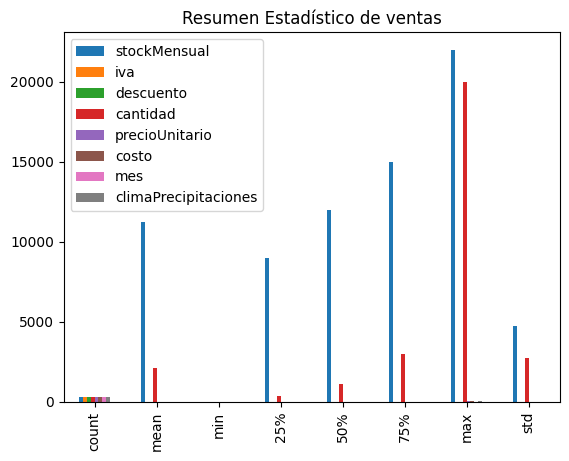

In [ ]:
df.describe().plot(kind='bar')
plt.title('Resumen Estadístico de ventas')
plt.show()

In [ ]:
df.columns.tolist()

['codFactura',
 'fechaEmision',
 'stockMensual',
 'rucCICli',
 'nombreCli',
 'telefono',
 'direccion',
 'zona',
 'correo',
 'formaPago',
 'iva',
 'descuento',
 'codProducto',
 'nombreProducto',
 'categoria',
 'unidadMedida',
 'tipo',
 'materiaPrima',
 'cantidad',
 'precioUnitario',
 'costo',
 'vendedor',
 'mes',
 'climaPrecipitaciones']

In [ ]:
df.index

RangeIndex(start=0, stop=309, step=1)

In [ ]:
df.dtypes

,0
codFactura,object
fechaEmision,datetime64[ns]
stockMensual,int64
rucCICli,object
nombreCli,object
telefono,object
direccion,object
zona,object
correo,object
formaPago,object


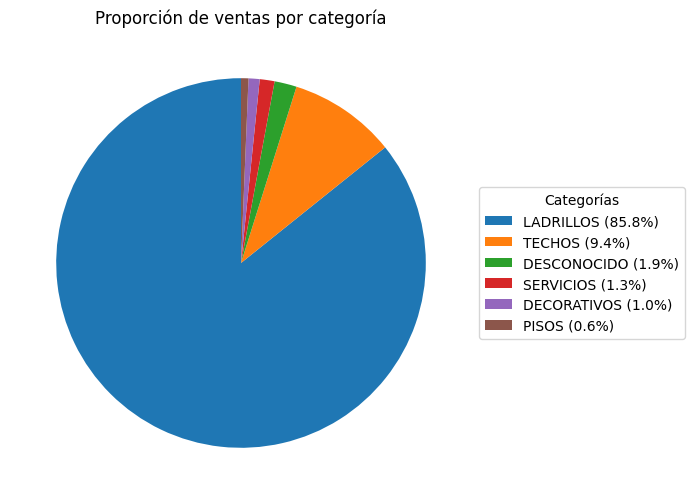

In [ ]:
conteos = df.categoria.value_counts()
legend_labels = [f"{label} ({value:.1f}%)" for label, value in zip(conteos.index, conteos/conteos.sum()*100)]
plt.figure(figsize=(8, 6))
plt.pie(conteos, startangle=90)
plt.title('Proporción de ventas por categoría')
plt.legend(legend_labels, title="Categorías", loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

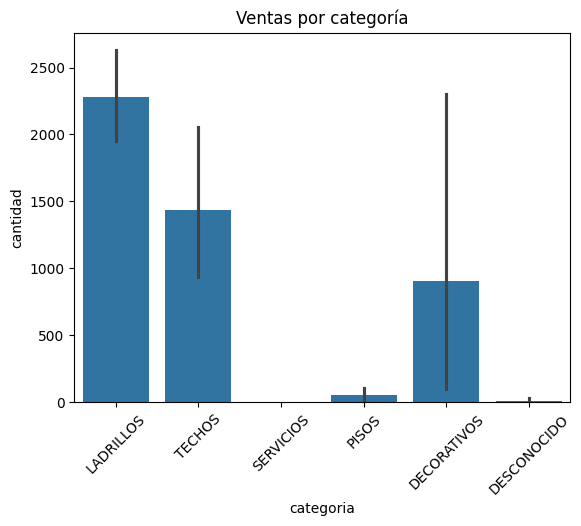

In [ ]:
sns.barplot(x='categoria', y='cantidad', data=df)
plt.title('Ventas por categoría')
plt.xticks(rotation=45)
plt.show()

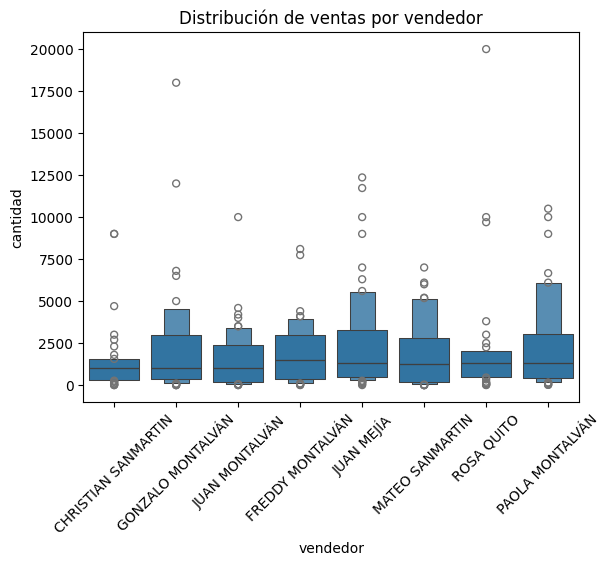

In [ ]:
sns.boxenplot(x='vendedor', y='cantidad', data=df)
plt.title('Distribución de ventas por vendedor')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.fechaEmision.dt.year.sort_values().unique().tolist()

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]

<ipython-input-29-d189178f70e6>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.anio = df.fechaEmision.dt.year


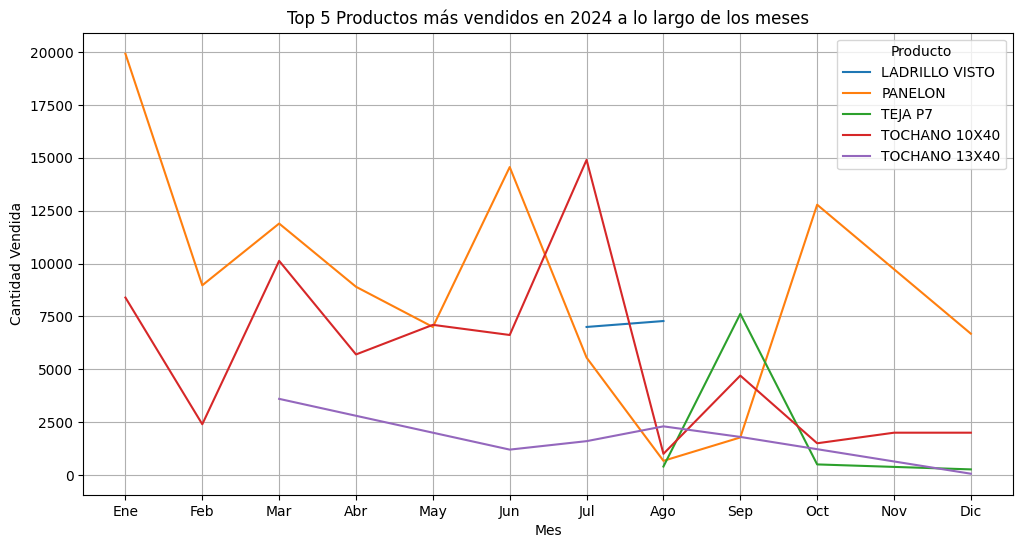

In [ ]:
def ver_productos_mas_vendidos(n, anio, df):

    df.fechaEmision = pd.to_datetime(df.fechaEmision)
    df.anio = df.fechaEmision.dt.year
    df = df[df.anio == anio]

    ventas_por_mes = df.groupby(['nombreProducto', 'mes'])['cantidad'].sum().reset_index()
    top_productos = ventas_por_mes.groupby('nombreProducto')['cantidad'].sum().nlargest(n).index
    ventas_top = ventas_por_mes[ventas_por_mes['nombreProducto'].isin(top_productos)]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=ventas_top, x='mes', y='cantidad', hue='nombreProducto', markers=True)
    plt.title(f'Top {n} Productos más vendidos en {anio} a lo largo de los meses')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.legend(title='Producto')
    plt.grid()
    plt.show()


ver_productos_mas_vendidos(5, 2024, df)

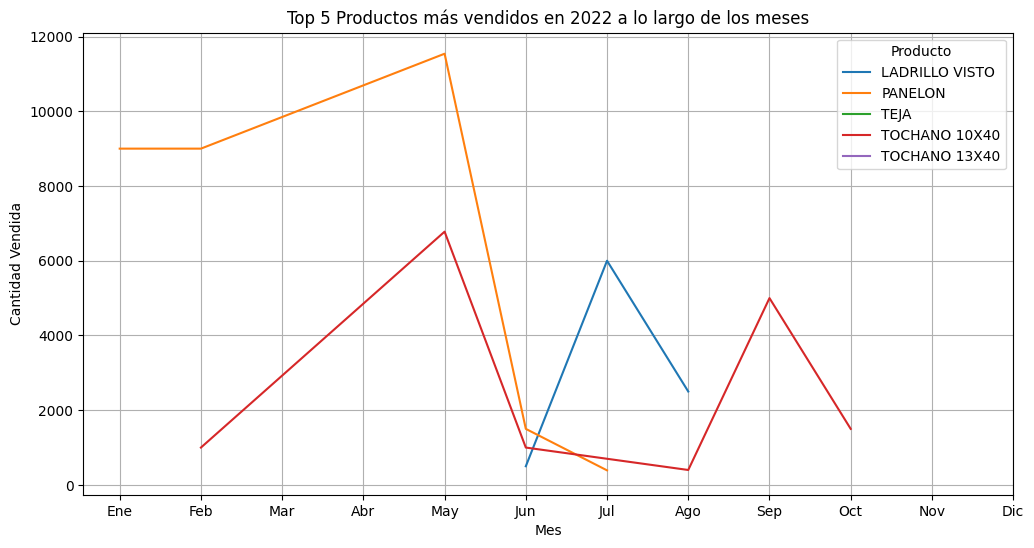

In [ ]:
ver_productos_mas_vendidos(5, 2022, df)

<hr>
<br>
<h2><b>EXPORTANDO LOS RESULTADOS</b></h2>

In [ ]:
df.fechaEmision = df.fechaEmision.astype(str)
df.to_excel('DatosLimpios.xlsx', index=False)
print(f'DataFrame guardado exitosamente en DatosLimpios.xlsx')

DataFrame guardado exitosamente en DatosLimpios.xlsx
